# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
#me
df.isnull().sum(axis=0)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A5AB58548>,
      dtype=object)

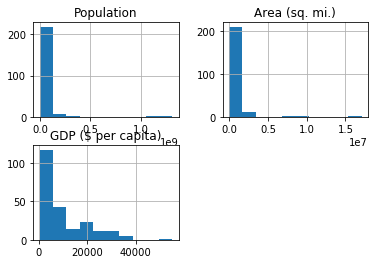

In [70]:
df.hist()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-some columns do not have the proper data type        <br>
2-nulls       <br>
3-           <br>

In [105]:
#make a copy for the original dataset
df_copy=df.copy()

In [106]:
df_copy.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [107]:
#solution 
#Convert the object type for some features to int
wrong_object = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration',
                'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)',
                'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate','Agriculture',
                'Industry', 'Service']
#df_copy[wrong_object] = df_copy[wrong_object].replace(',','.')
#df_copy[wrong_object] = df_copy[wrong_object].replace(',','.')

df_copy = df_copy.replace(',','.', regex=True)

In [108]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN


In [109]:
df_copy[wrong_object] = df_copy[wrong_object].apply(np.float64)

In [110]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [111]:
#test 
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


**Second issue**

In [112]:
#solution 
#Impute NaNs with the mean
columns = ['Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
           'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)',
           'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']

In [113]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [114]:
df_copy.fillna(df_copy.mean(), inplace=True)

In [115]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [116]:
df_copy = df_copy.round(decimals=2)

In [117]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.10,0.60,0.30
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.28,0.57
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.28,0.57


In [103]:
pd.get_dummies(df_copy, prefix=['Country','Region'])

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.00,36.00,3.20,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.00,86.50,71.20,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.00,70.00,78.10,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.00,97.00,259.50,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.00,100.00,497.20,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.00,82.84,145.20,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.04,35.51,9689.82,82.84,236.06,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.00,50.20,37.20,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.00,80.60,8.20,7.08,...,0,0,0,0,0,0,0,0,1,0


In [104]:
df_copy.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.10,0.60,0.30
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.28,0.57
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.28,0.57


In [118]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [119]:
df_copy['Country'] = ord_enc.fit_transform(df_copy[['Country']])

In [120]:
df_copy['Region'] = ord_enc.fit_transform(df_copy[['Region']])

In [121]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.0,0.0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,1.0,3.0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58
2,2.0,6.0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.10,0.60,0.30
3,3.0,8.0,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.28,0.57
4,4.0,10.0,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.28,0.57


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [122]:
from sklearn import preprocessing

In [123]:
#Pre-processing done
min_max = preprocessing.MinMaxScaler()

In [124]:
df_copy.iloc[:,2:]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.00,36.00,3.20,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.00,86.50,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.00,70.00,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.10,0.60,0.30
3,57794,199,290.4,58.29,-20.71,9.27,8000.00,97.00,259.50,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.28,0.57
4,71201,468,152.1,0.00,6.60,4.05,19000.00,100.00,497.20,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.28,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.00,82.84,145.20,16.90,18.97,64.13,3.0,31.67,3.92,0.09,0.28,0.63
223,273008,266000,1.0,0.42,0.04,35.51,9689.82,82.84,236.06,0.02,0.00,99.98,1.0,22.11,9.24,0.15,0.28,0.40
224,21456188,527970,40.6,0.36,0.00,61.50,800.00,50.20,37.20,2.78,0.24,96.98,1.0,42.89,8.30,0.14,0.47,0.39
225,11502010,752614,15.3,0.00,0.00,88.29,800.00,80.60,8.20,7.08,0.03,92.90,2.0,41.00,19.93,0.22,0.29,0.49


In [125]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.0,0.0,31056997,647500,48.0,0.00,23.06,163.07,700.00,36.00,3.20,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,1.0,3.0,3581655,28748,124.6,1.26,-4.93,21.52,4500.00,86.50,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58
2,2.0,6.0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.00,70.00,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.10,0.60,0.30
3,3.0,8.0,57794,199,290.4,58.29,-20.71,9.27,8000.00,97.00,259.50,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.28,0.57
4,4.0,10.0,71201,468,152.1,0.00,6.60,4.05,19000.00,100.00,497.20,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.28,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222.0,5.0,2460492,5860,419.9,0.00,2.98,19.62,800.00,82.84,145.20,16.90,18.97,64.13,3.0,31.67,3.92,0.09,0.28,0.63
223,223.0,6.0,273008,266000,1.0,0.42,0.04,35.51,9689.82,82.84,236.06,0.02,0.00,99.98,1.0,22.11,9.24,0.15,0.28,0.40
224,224.0,5.0,21456188,527970,40.6,0.36,0.00,61.50,800.00,50.20,37.20,2.78,0.24,96.98,1.0,42.89,8.30,0.14,0.47,0.39
225,225.0,9.0,11502010,752614,15.3,0.00,0.00,88.29,800.00,80.60,8.20,7.08,0.03,92.90,2.0,41.00,19.93,0.22,0.29,0.49


In [126]:
df_array = df_copy.to_numpy()
df_array

array([[0.0000000e+00, 0.0000000e+00, 3.1056997e+07, ..., 3.8000000e-01,
        2.4000000e-01, 3.8000000e-01],
       [1.0000000e+00, 3.0000000e+00, 3.5816550e+06, ..., 2.3000000e-01,
        1.9000000e-01, 5.8000000e-01],
       [2.0000000e+00, 6.0000000e+00, 3.2930091e+07, ..., 1.0000000e-01,
        6.0000000e-01, 3.0000000e-01],
       ...,
       [2.2400000e+02, 5.0000000e+00, 2.1456188e+07, ..., 1.4000000e-01,
        4.7000000e-01, 3.9000000e-01],
       [2.2500000e+02, 9.0000000e+00, 1.1502010e+07, ..., 2.2000000e-01,
        2.9000000e-01, 4.9000000e-01],
       [2.2600000e+02, 9.0000000e+00, 1.2236805e+07, ..., 1.8000000e-01,
        2.4000000e-01, 5.8000000e-01]])

In [127]:
min_max_scaled = preprocessing.MinMaxScaler().fit_transform(df_array)
min_max_scaled

array([[0.        , 0.        , 0.02363071, ..., 0.49350649, 0.24719101,
        0.35955056],
       [0.00442478, 0.3       , 0.00272049, ..., 0.2987013 , 0.19101124,
        0.58426966],
       [0.00884956, 0.6       , 0.02505624, ..., 0.12987013, 0.65168539,
        0.26966292],
       ...,
       [0.99115044, 0.5       , 0.01632398, ..., 0.18181818, 0.50561798,
        0.37078652],
       [0.99557522, 0.9       , 0.00874831, ..., 0.28571429, 0.30337079,
        0.48314607],
       [1.        , 0.9       , 0.00930753, ..., 0.23376623, 0.24719101,
        0.58426966]])

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [128]:
import scipy.cluster.hierarchy as shc

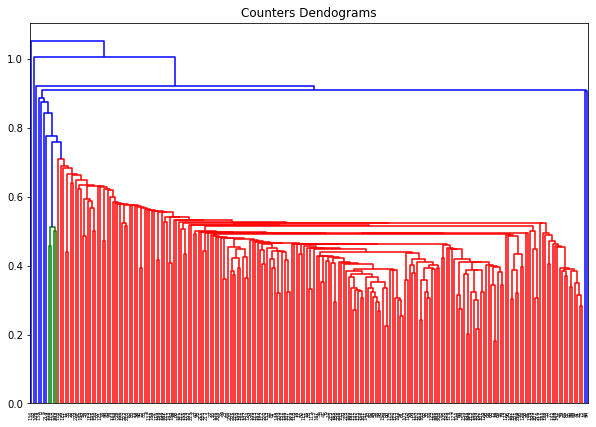

In [129]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= min_max_scaled, method= 'single',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

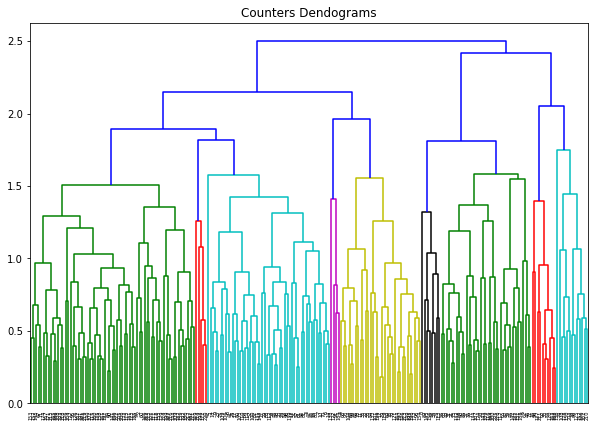

In [160]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= min_max_scaled, method= 'complete',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

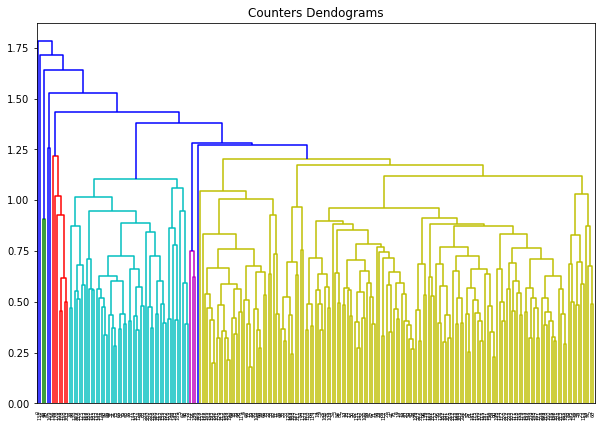

In [159]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= min_max_scaled, method= 'average',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [130]:
from sklearn.metrics import silhouette_score

In [151]:
silhouette_score(min_max_scaled, labels=clustering.labels_, metric='euclidean')

0.18600645899360566

In [150]:
clustering = AgglomerativeClustering(n_clusters=3).fit(min_max_scaled)
clustering.labels_

array([0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [157]:
#training
from sklearn.cluster import AgglomerativeClustering

In [158]:
from sklearn.decomposition import PCA

In [156]:
X_principal

,P1,P2
0,1.054912,0.516103
1,-0.177245,0.351753
2,0.209756,0.037538
3,-0.108747,-0.097935
4,-0.422026,-0.578308
...,...,...
222,-0.011000,0.200447
223,0.192821,-0.104488
224,0.715063,0.097484
225,0.666449,-0.295953


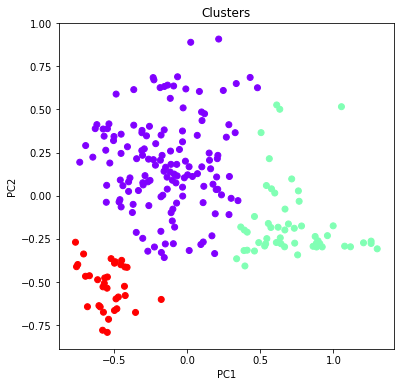

In [155]:
pca = PCA(n_components = 2)

X_principal = pca.fit_transform(min_max_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac.fit_predict(X_principal), cmap ='rainbow')

plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 